# Exploratory Data Analysis
Hypotheses:

- I expect tax value to be primarily driven by:
  - square feet: more sf will increase price values
  - bed/bath number: more beds and baths will increase tax values
  - sf_per_bed: Higher sf_per_bd will increase tax values
  - zip: Tax values will vary high or lower than average by zip code. (there will be clustering)
  - county: Orange and LA county will have higher tax values than Ventura. LA is expected to have wider range of values than Orange
  
  
Some Questions:
- How do the continuous variables correlate with tax value?
- Does sf_per_bed correlate better with tax value than sf or bed?
- Is there tax value clustering by zip code?
- Does county affect mean tax value?

In [1]:
#Basics
import numpy as np
import pandas as pd
from itertools import combinations, product, permutations

#Stats
from scipy import stats

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='colorblind')

#My Modules
from wrangle import wrangle_zillow
import utils

#Ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

#### Acquire and prep data

In [2]:
#Acquire Data
tr, te, val = wrangle_zillow(include_zip=True)

In [3]:
tr.columns[0:12]

Index(['value', 'zipcode', 'county', 'bed', 'bath', 'sf', 'sf_per_bed',
       'yearbuilt', 'Orange_CA', 'Ventura_CA', '95983', '95984'],
      dtype='object')

In [4]:
#Get eda subset
tr_eda = tr.iloc[:,:8]
tr_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35072 entries, 6909 to 4306
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       35072 non-null  int64  
 1   zipcode     35072 non-null  object 
 2   county      35072 non-null  object 
 3   bed         35072 non-null  int64  
 4   bath        35072 non-null  float64
 5   sf          35072 non-null  int64  
 6   sf_per_bed  35072 non-null  float64
 7   yearbuilt   35072 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 2.4+ MB


## Univariate
- descriptive stats
- frequencies/histograms

### Categorical

In [5]:
tr_eda.county.value_counts()

LosAngeles_CA    22617
Orange_CA         9469
Ventura_CA        2986
Name: county, dtype: int64

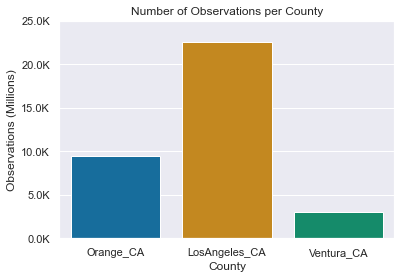

In [6]:
ax = sns.countplot(x=tr_eda.county);
ylabels = ['{:.1f}'.format(y) + 'K' for y in ax.get_yticks()/1000];
ax.set(ylabel='Observations (Millions)',xlabel='County',title='Number of Observations per County',yticks=ax.get_yticks(),yticklabels=ylabels);

In [7]:
tr_eda.zipcode.value_counts()

97319    553
97318    470
97329    405
97328    363
97118    346
        ... 
96245     22
96129     21
96135     21
96126     20
96324     20
Name: zipcode, Length: 332, dtype: int64

<AxesSubplot:xlabel='zipcode', ylabel='Count'>

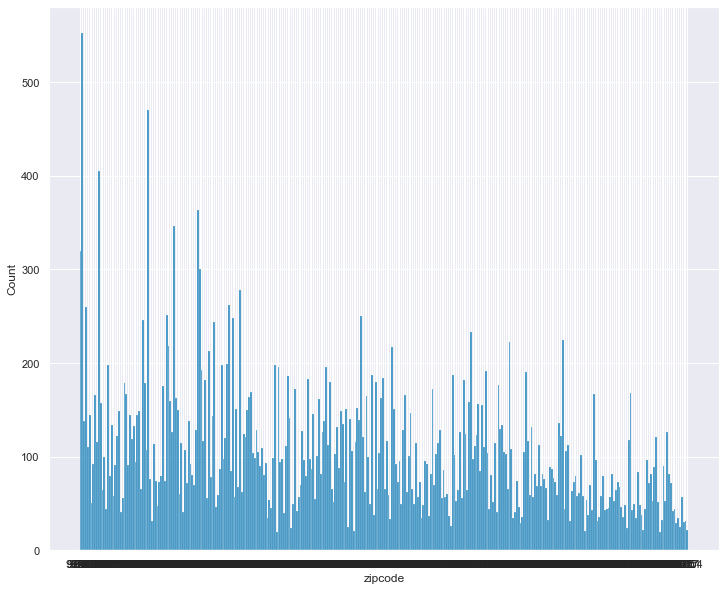

In [8]:
plt.figure(figsize=(12,10))
sns.histplot(x=tr_eda.zipcode)

**Notes:** 
- Significantly more observations in LA county than Orange, and significantly more Orange obs. than Ventura
- Range of observations by zipcode

### Continuous

In [9]:
tr_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
value,35072.0,443541.234546,352390.667190,3254.0,189394.0,364078.0,585721.5000,1.997251e+06
bed,35072.0,3.290545,0.897999,0.0,3.0,3.0,4.0000,8.000000e+00
bath,35072.0,2.245552,0.907058,1.0,2.0,2.0,3.0000,8.000000e+00
sf,35072.0,1850.992558,828.433773,300.0,1262.0,1640.0,2241.0000,7.942000e+03
sf_per_bed,35072.0,562.803816,185.528607,163.0,427.5,524.0,652.8125,1.495667e+03
yearbuilt,35072.0,1963.495153,22.640432,1878.0,1950.0,1961.0,1979.0000,2.016000e+03


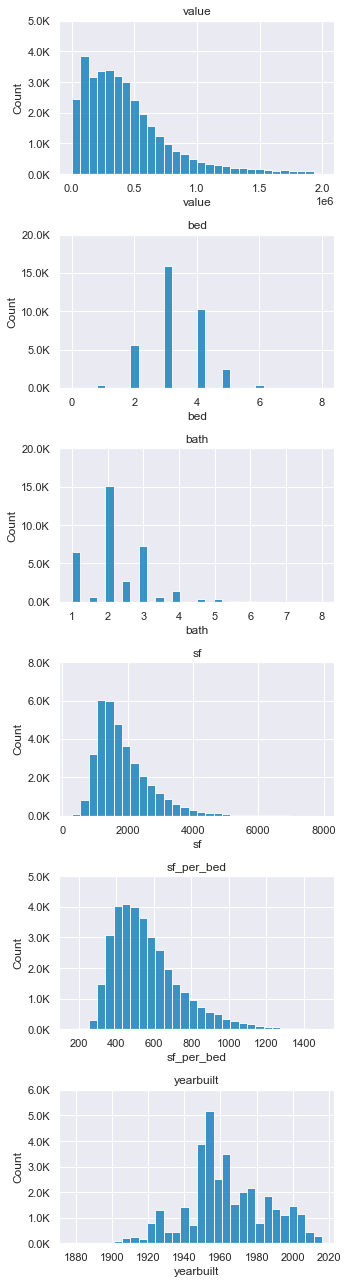

In [10]:
plt.figure(figsize=(5,18))
ct=0
for c in tr_eda.select_dtypes(exclude='object').columns:
    ct+=1
    plt.subplot(6,1,ct)
    ax = sns.histplot(data=tr_eda[c], bins=30)
    ax.set_title(c)
    utils.yticks_k(ax)

plt.tight_layout()

### Univariate Summary:
- County has ~3x the observations in LA than Orange, and Orange has ~3x the observations than Ventura.
- Value is skewed right, few values past 1 million
- Both beds and baths are normalish
- SF is skewed right, very few values past 4k
- sf_per bed is skewed right, very few values bast 1000 sf/bed
- Year built is normalish with slight left skew, very few values before 1920

## Bivariate
- interactions with target
- hypothesis testing

##### Plot numeric vs numeric features

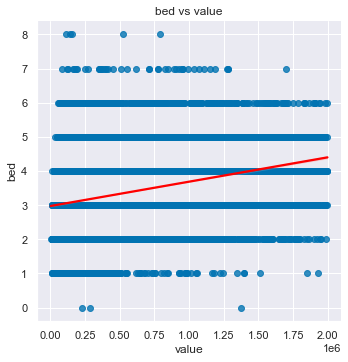

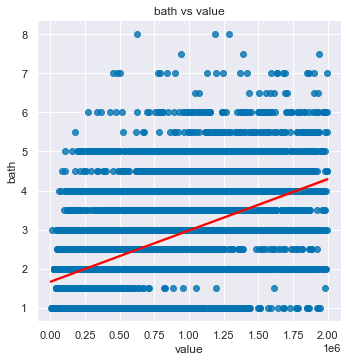

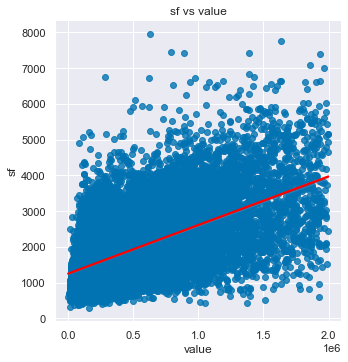

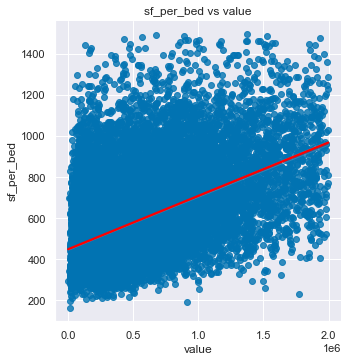

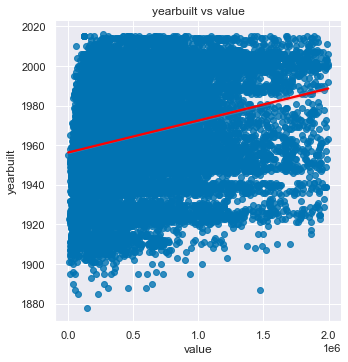

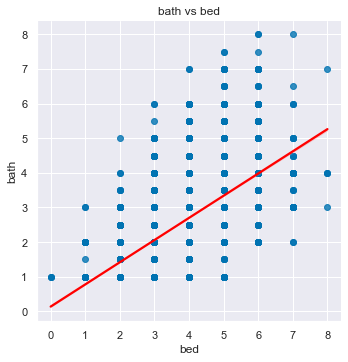

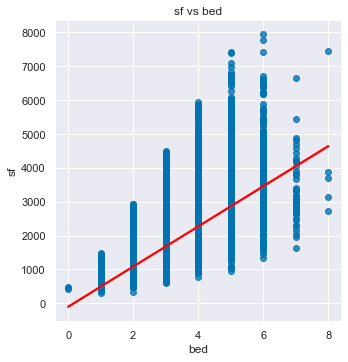

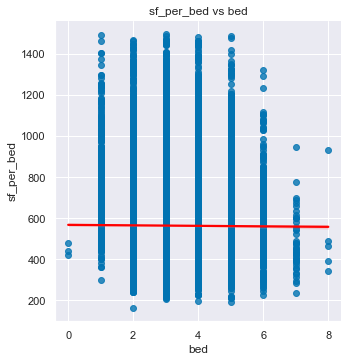

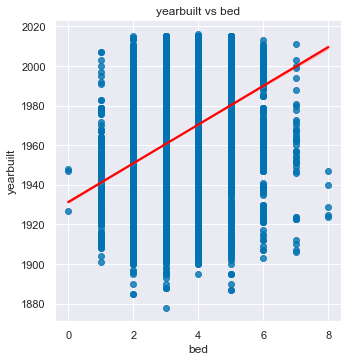

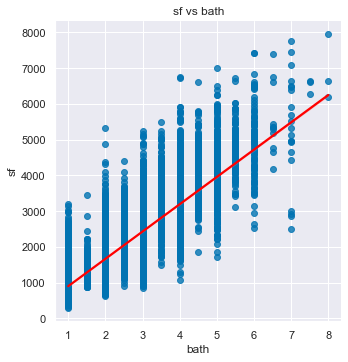

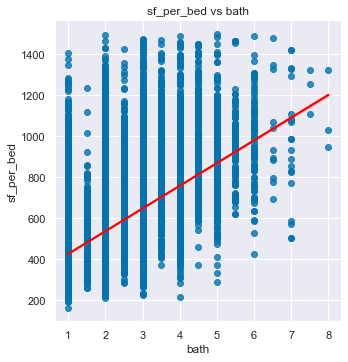

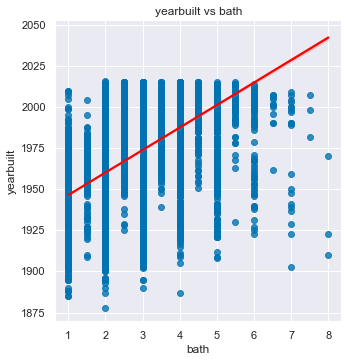

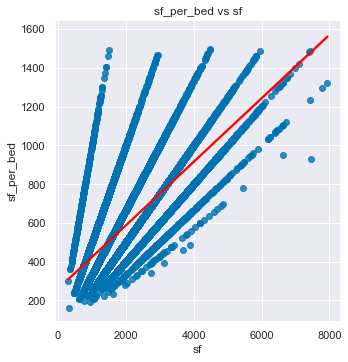

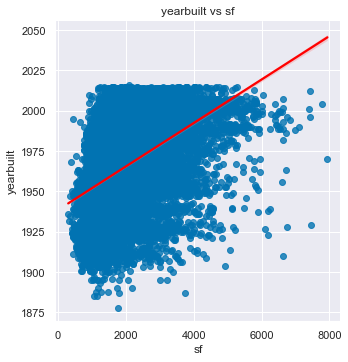

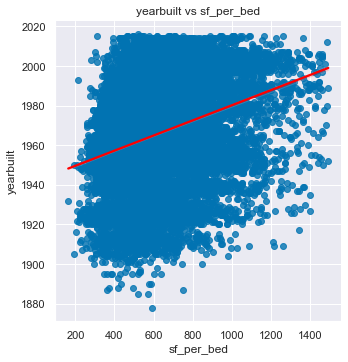

In [11]:
utils.plot_variable_pairs(tr_eda)

**NOTES:** There seems to be some small correlation between bed, yearbuilt, bath and sf with value.  sf_per_bed seeems to have the highest correlation with value, followed by sf and bath.  Testing that below

In [12]:
tr_eda.columns

Index(['value', 'zipcode', 'county', 'bed', 'bath', 'sf', 'sf_per_bed',
       'yearbuilt'],
      dtype='object')

In [13]:
#Look at numeric features vs target
for f in ['bed', 'bath', 'sf', 'sf_per_bed','yearbuilt']:
    h0 = f'There is no linear correlation between {f}  and the tax value of a property'
    corr, p = stats.pearsonr(tr_eda.value,tr_eda[f])
    #use default alpha of .05
    utils.stats_result(p,h0,corr=corr)
    


H₀: There is no linear correlation between bed  and the tax value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.28002625923368074

H₀: There is no linear correlation between bath  and the tax value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.5113058913682358

H₀: There is no linear correlation between sf  and the tax value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.5791702464798284

H₀: There is no linear correlation between sf_per_bed  and the tax value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.49531259954185275

H₀: There is no linear correlation between yearbuilt  and the tax value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.25194360838051233


**NOTES:**
- While all show some correlation, bed and yearbuilt have the smalles correlation coefficient
- Bath and sf_per_bed have the next highest correlation coefficient (above .5)
- Sf has the highest at .6

**Answers:** sf_per_bed correlates better with tax value than number of bedrooms, but worse than square footage.

##### Plot categorical vs numeric

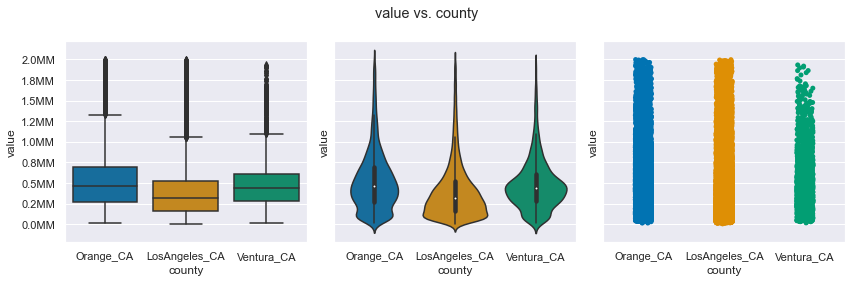

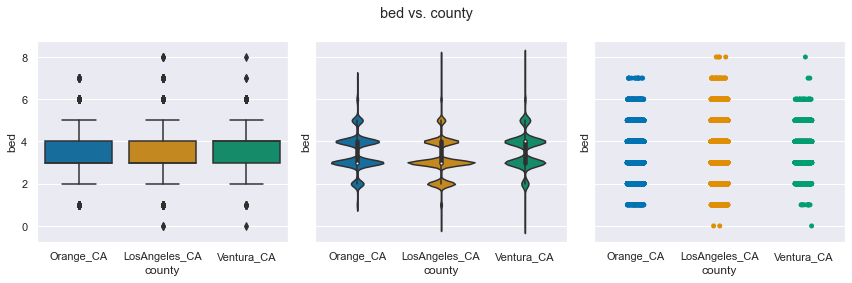

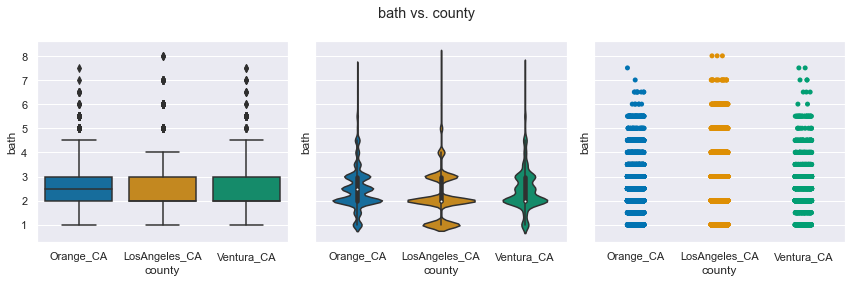

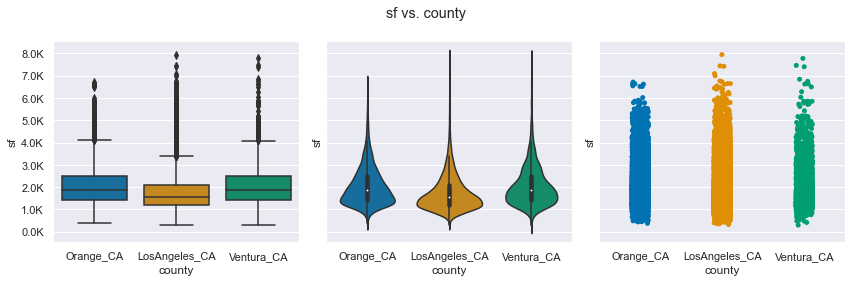

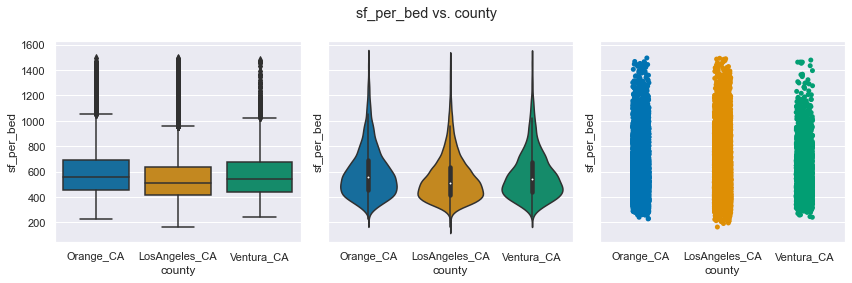

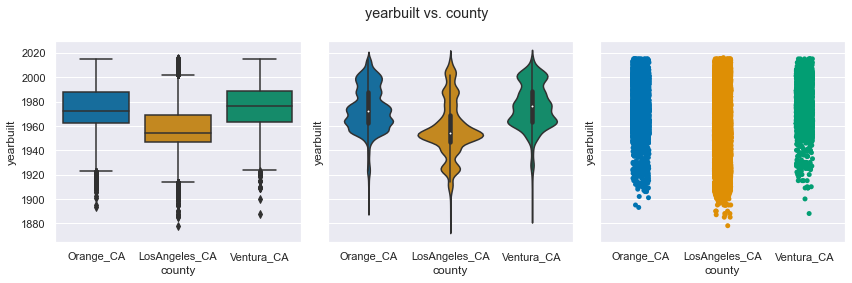

In [14]:
#Only plot county for now
utils.plot_cat_and_continuous(tr_eda,cat_cols=['county'])

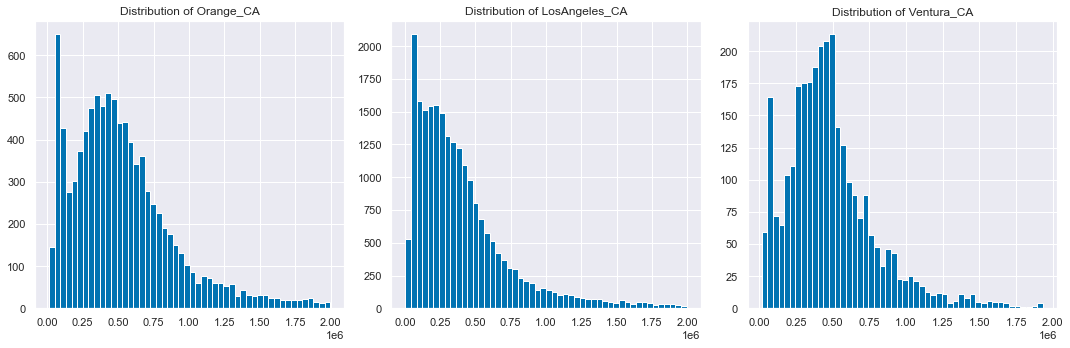

In [15]:
#ANOVA
ct=0
plt.figure(figsize=(15,5))
for cat in tr_eda.county.unique():
    ct+=1
    plt.subplot(1,3,ct)
    plt.hist(tr_eda[tr_eda.county == cat].value,bins=50)
    plt.title(f'Distribution of {cat}')

plt.tight_layout()

In [16]:
#Normalish (but skewed) and large number of values
values_la = tr_eda[tr_eda.county == 'LosAngeles_CA'].value
values_orange = tr_eda[tr_eda.county == 'Orange_CA'].value
values_ventura = tr_eda[tr_eda.county == 'Ventura_CA'].value
#Check variances
print(f'{values_la.var():,.0f}\n{values_orange.var():,.0f}\n{values_ventura.var():,.0f}')

118,412,856,239
135,499,876,814
94,327,388,390


In [17]:
f, p = stats.f_oneway(values_la,values_orange,values_ventura)
h0='the population means of tax values for the three counts are all equal'
utils.stats_result(p,h0,f=f)


H₀: the population means of tax values for the three counts are all equal
We reject the null hypothesis, p = 3.571287569853696e-200 | α = 0.05


**NOTES:**
- Ventura and Orange counties appear to have a higher median value. LA count has a wide band of low value homes in comparison.  While LA county appears to have more high value homes, that is likely caused by the higher number of observations
- Ventura has a higher median number of beds
- LA has a slightly lower median number of baths, square footage, sf_per_bed and yearbuilt

**ANSWERS:** Do counties have different mean tax values? YES


(0.0, 1500000.0)

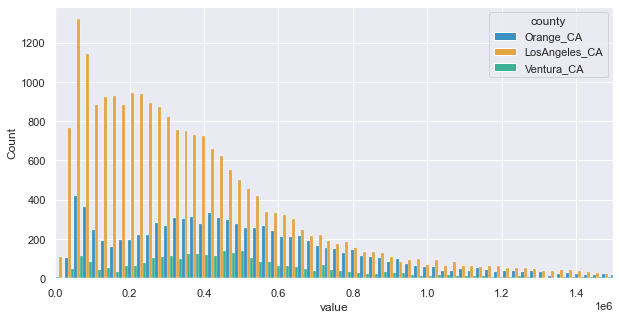

In [18]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=tr_eda, x='value',hue='county',multiple='dodge')
ax.set_xlim((0,1_500_000))

**notes:** plot shows Orange and Ventura having a notable concentration of properties with values around 400k +/-100k.  Whereas LA has a wider band of properties with values b/w 100 and 400k.

##### Zipcode vs continous

In [19]:
#now look at zip code and other variables.  But do zipcode subsets as there are too many to properly visualize on one 
zip_cnt = tr_eda.zipcode.value_counts()
#zipcode with most observations
tr_eda_top5zip = tr_eda[tr_eda.zipcode.isin(zip_cnt.nlargest().index)]
#zipcodes with median number of observations (approximate)
tr_eda_mid5zip = tr_eda[tr_eda.zipcode.isin(zip_cnt.iloc[150:155].index)]

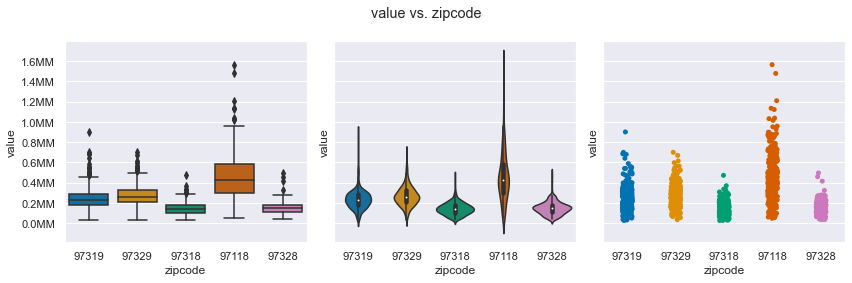

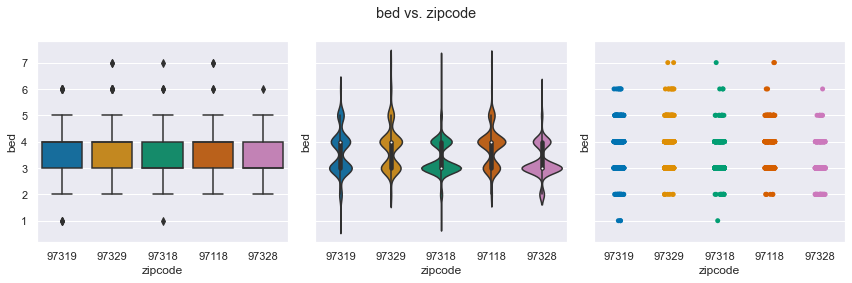

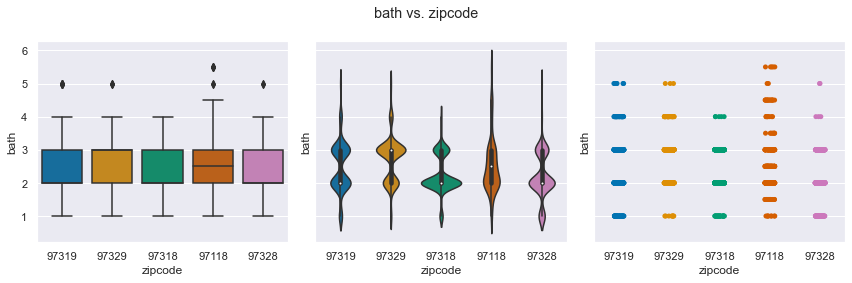

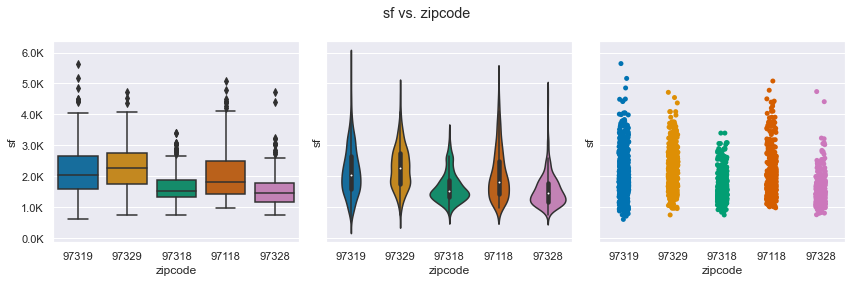

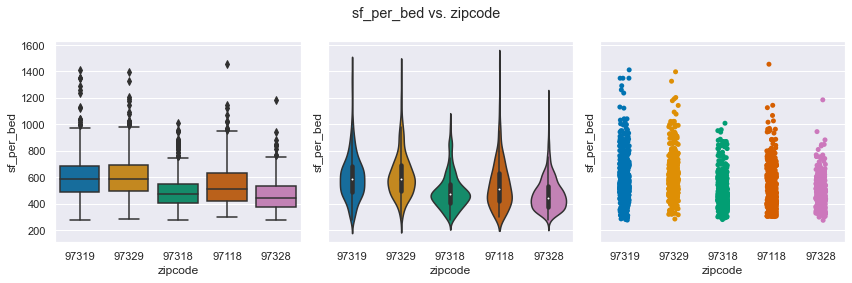

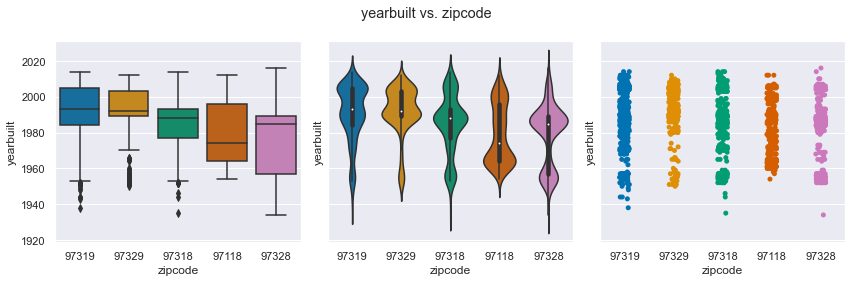

In [20]:
#plot the top 5
utils.plot_cat_and_continuous(tr_eda_top5zip,cat_cols=['zipcode'])

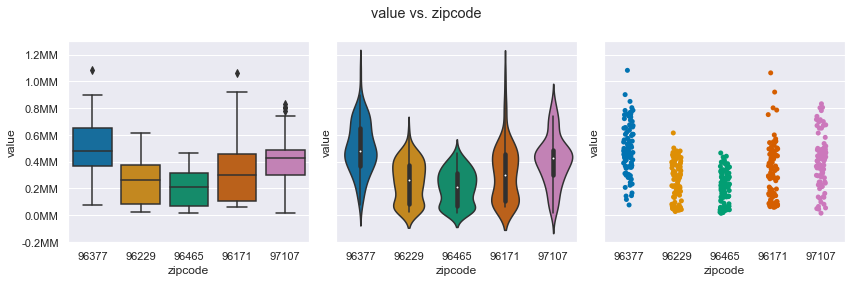

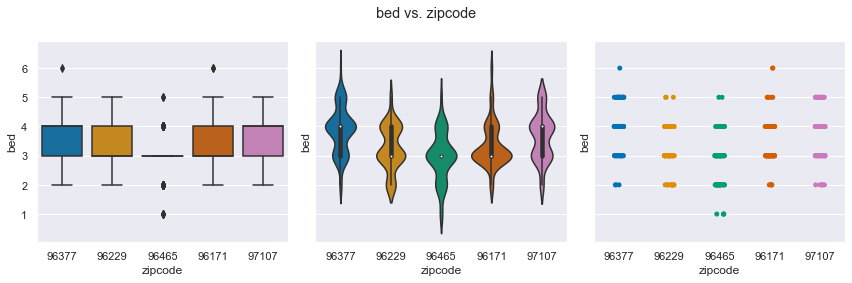

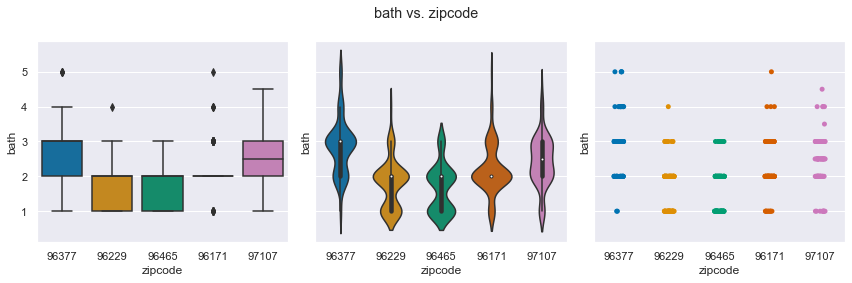

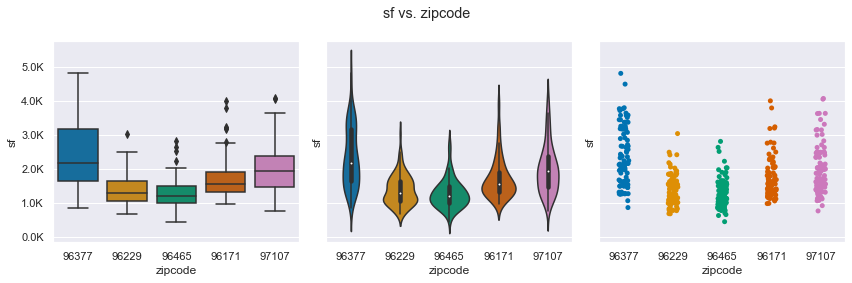

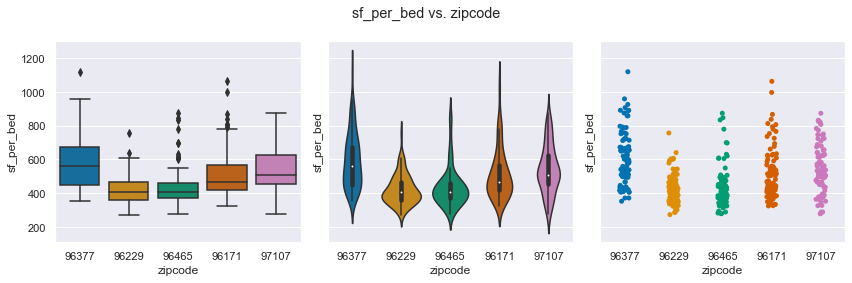

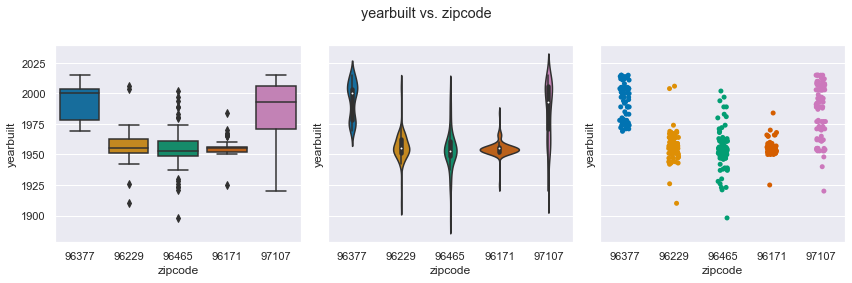

In [21]:
#plot the mid 5
utils.plot_cat_and_continuous(tr_eda_mid5zip,cat_cols=['zipcode'])

**NOTES:** These show notable differences in value by zip code.
**Answers:** There is some (visual) price clustering by zip code - stat test not done yet.

**TIME PERMITTING:** Generate a loop to run t-test of one zip code vs all.  Store p, t in df and get stats on % that are statistically significant.  Brainstorm how to use this to influence model.  (first model w/ only zip)

### Bivariate Summary
- County: 
  - Orange/Ventura counties show a dip in # of properties b/w 100k and 200k, whereas LA stays steady and has a large number just shy of 100k. 
  - ANOVA rejected null hypothesis that value means were equal b/w the counties
- Zipcode: visually there appears to be a notable correlation between zipcode and value.  Will pursue later if time permits.
- Bed, yearbuilt, bath, sf_per_bed and sf all have statistically signifcant correlation with value
  - bed and yearbuilt are mildly coorelated
  - bath and sf_per_bed were moderately correlated (correlation coefficient > .5)
  - sf had the highest correlation at .62


## Multivariate

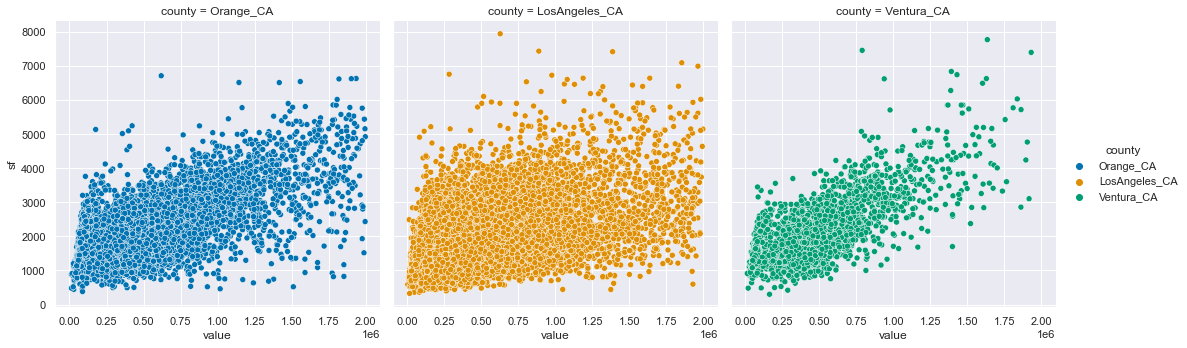

In [22]:
#value, squarefoot, hue county
sns.relplot(data=tr_eda,y='sf',x='value',col='county',hue='county')

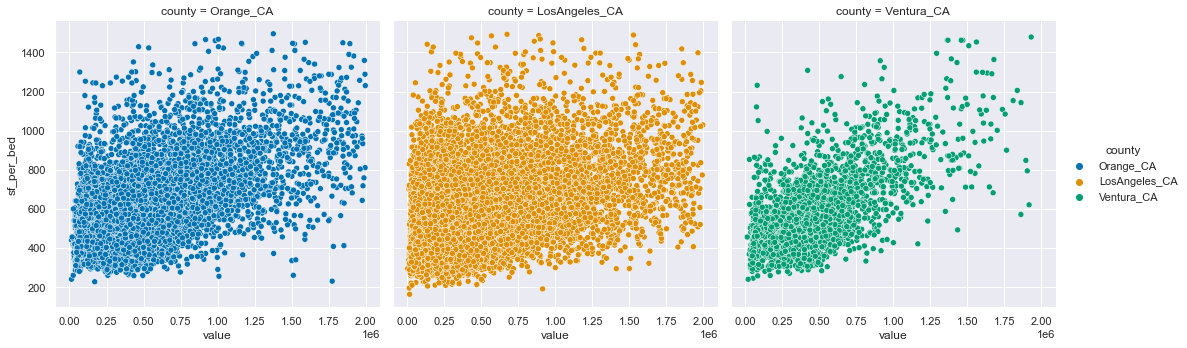

In [23]:
#value, sf_per_bed, hue county
sns.relplot(data=tr_eda,y='sf_per_bed',x='value',col='county',hue='county')

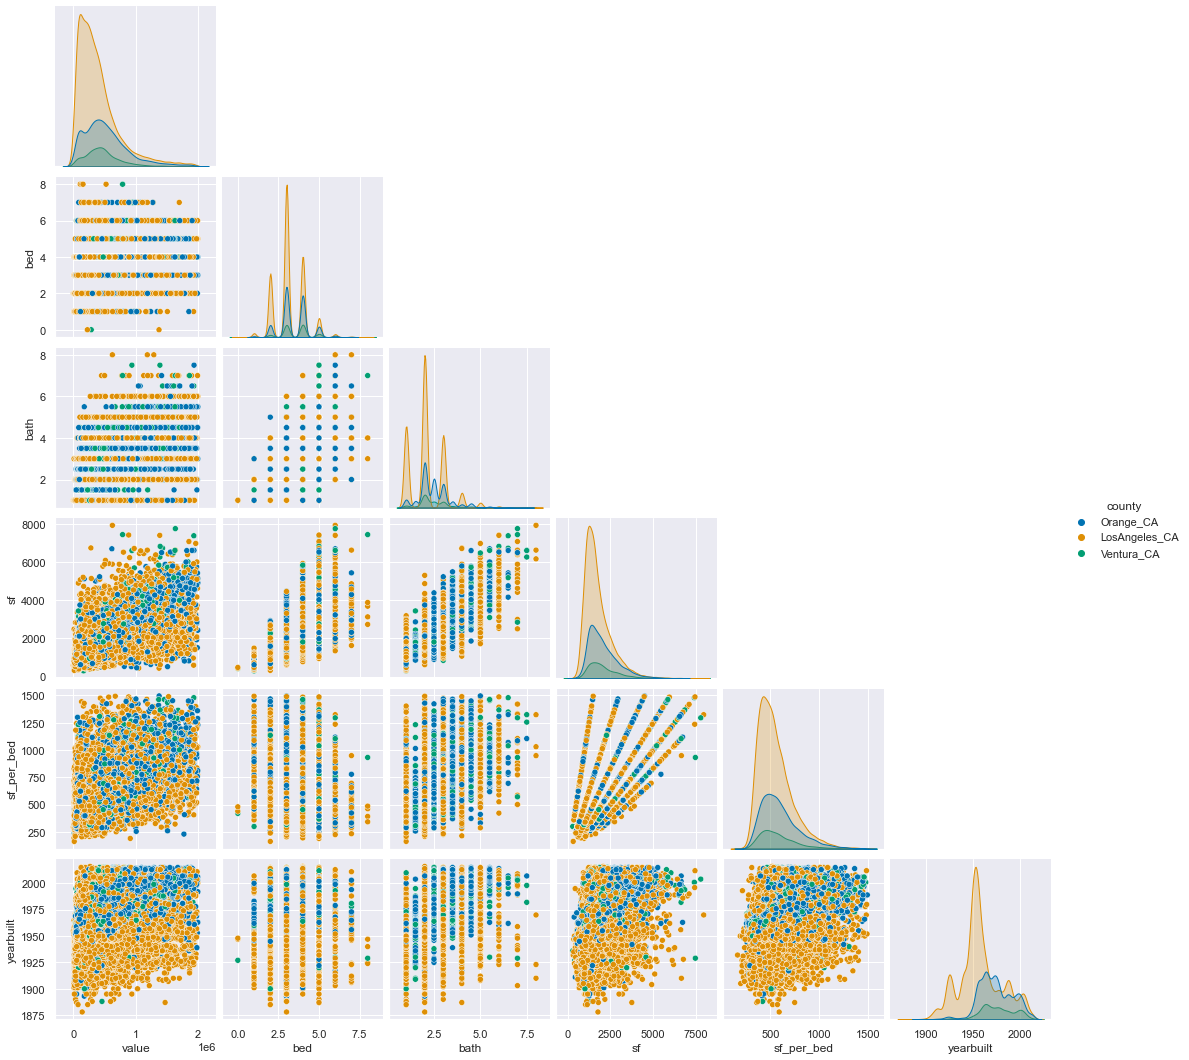

In [24]:
sns.pairplot(data=tr_eda,corner=True, hue='county')

<Figure size 864x288 with 0 Axes>

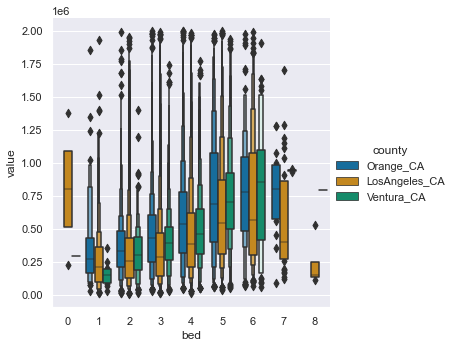

In [25]:
plt.figure(figsize=(12,4))
sns.catplot(data=tr_eda,hue='county',x='bed',y='value', kind='boxen')

## Exploration Summary:
**Key takeaways:**
- Square footage has the highest correlation with tax value (.58), followed by number of baths and square footage per bedroom.
- County:
  - ~3x the observations in LA than Orange, and Orange has ~3x the observations than Ventura.
  - Orange/Ventura counties show a dip in # of properties b/w 100k and 200k, whereas LA stays steady and has a large number just shy of 100k.
  - ANOVA rejected null hypothesis that value means were equal b/w the counties
  - **ANSWERS:** Do counties have different mean tax values? YES
- Zipcode: visually there appears to be a notable correlation between zipcode and value. Will pursue later if time permits.
  - **Answers:** Is there tax value differences in different zipcodes?  Yes (visual) price clustering, stat test not done yet.
- Bed, yearbuilt, bath, sf_per_bed and sf all have statistically signifcant correlation with value
  - **Answers:** sf_per_bed correlates better with tax value than number of bedrooms, but worse than square footage.
- bed and yearbuilt are mildly coorelated
- bath and sf_per_bed were moderately correlated (correlation coefficient > .5)
- sf had the highest correlation at .62

**Modeling:**
- I will be using multiple subsets of features for modeling.
- Zip code seems important, so I will be including some models with all 300+ columns.  I will pay extra attention to performance on out-of-sample data.

**Future:**
- Try more engineered features:
  - bed+bath
  - sf/(bed+bath)
- Do more analysis on zip code (stats test, more visualizations)